In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [2]:
import matplotlib.pyplot as plt

In [3]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [4]:
TrainData=datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True
)
TestData=datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True
)

In [5]:
print("Train Data: \n Shape:",TrainData.data.shape,"\n Test data \n Shape: ",TestData.data.size())

Train Data: 
 Shape: torch.Size([60000, 28, 28]) 
 Test data 
 Shape:  torch.Size([10000, 28, 28])


In [6]:
#Importing DataLoaders
TrainLoader=DataLoader(TrainData,batch_size=128,shuffle=True,num_workers=1)
TestLoader=DataLoader(TestData, batch_size=128,shuffle=True,num_workers=1)

print(TrainLoader)
print(TestLoader)

In [7]:
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1=nn.Linear(28 * 28,256)
        self.batch_norm1=nn.BatchNorm1d(256)
        self.dropout1=nn.Dropout(0.3)
        self.fc2=nn.Linear(256,64)
        self.batch_norm2=nn.BatchNorm1d(64)
        self.dropout2=nn.Dropout(0.3)
        self.fc3=nn.Linear(64,10)  #10 because there are 10 outputs (0-9).
        self.relu=nn.ReLU()
    def forward(self, var_x):
        var_x = var_x.view(-1, 28 * 28)
        #For the first layer
        var_x = self.fc1(var_x)
        var_x = self.relu(var_x)
        var_x = self.batch_norm1(var_x)
        var_x = self.dropout1(var_x)
        #Now for the second layer
        var_x = self.fc2(var_x)
        var_x = self.relu(var_x)
        var_x = self.batch_norm2(var_x)
        var_x = self.dropout2(var_x)
        
        #Output Layer
        var_x = self.fc3(var_x)
        return var_x

In [8]:
LearningRate = 0.0001
BatchSize = 128
Epochs = 11
Model = FNN().to(device)
Criterion = nn.CrossEntropyLoss()
Optimizer = optim.Adam(Model.parameters(), lr=LearningRate)
TrainLosses = []
TestLosses = []

# Training Data
for epoch in range(Epochs):
    Model.train()
    epoch_train_loss = 0  # Variable to accumulate training loss for the epoch
    for images, labels in TrainLoader:
        images, labels = images.to(device), labels.to(device)
        Optimizer.zero_grad()
        Outputs = Model(images)
        Loss = Criterion(Outputs, labels)
        Loss.backward()
        Optimizer.step()
        
        epoch_train_loss += Loss.item()
    
    # Average training loss for the epoch
    avg_train_loss = epoch_train_loss / len(TrainLoader)
    TrainLosses.append(avg_train_loss)

    # Testing Data
    Model.eval()
    TestLoss = 0
    with torch.no_grad():
        for image, label in TestLoader:
            image, label = image.to(device), label.to(device)
            test_outputs = Model(image)
            Loss = Criterion(test_outputs, label)
            TestLoss += Loss.item()
    
    TestLoss /= len(TestLoader)
    TestLosses.append(TestLoss)
    
    # Print average losses for the epoch
    print(f'Epoch [{epoch + 1}/{Epochs}], Training Loss: {avg_train_loss:.4f}, Testing Loss: {TestLoss:.4f}')


Epoch [1/11], Training Loss: 0.8206, Testing Loss: 0.3609
Epoch [2/11], Training Loss: 0.3555, Testing Loss: 0.2141
Epoch [3/11], Training Loss: 0.2419, Testing Loss: 0.1545
Epoch [4/11], Training Loss: 0.1827, Testing Loss: 0.1196
Epoch [5/11], Training Loss: 0.1520, Testing Loss: 0.1003
Epoch [6/11], Training Loss: 0.1281, Testing Loss: 0.0909
Epoch [7/11], Training Loss: 0.1091, Testing Loss: 0.0836
Epoch [8/11], Training Loss: 0.0981, Testing Loss: 0.0753
Epoch [9/11], Training Loss: 0.0872, Testing Loss: 0.0740
Epoch [10/11], Training Loss: 0.0774, Testing Loss: 0.0699
Epoch [11/11], Training Loss: 0.0734, Testing Loss: 0.0699


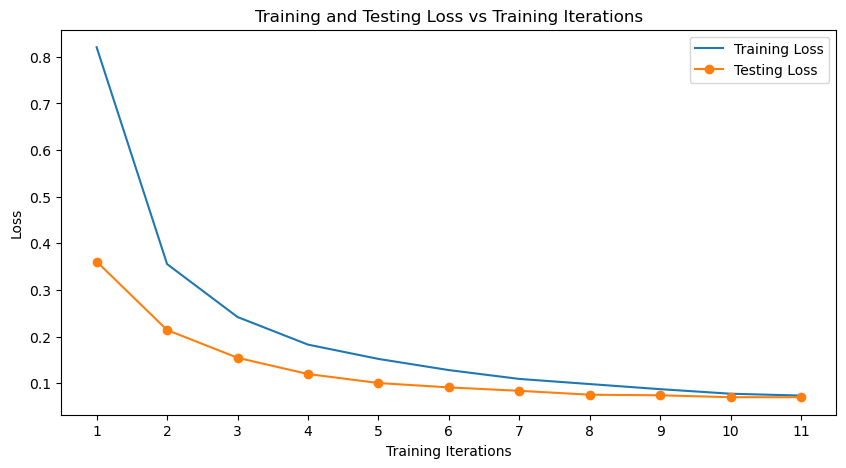

In [15]:
# Plotting the graphs
# (i) Training Loss vs Training Iterations
# (ii) Testing Loss vs Training Iterations
plt.figure(figsize=(10,5))
plt.plot(range(1,Epochs+1),TrainLosses, label='Training Loss')
plt.plot(range(1,Epochs+1), TestLosses, label='Testing Loss', marker='o')
plt.title('Training and Testing Loss vs Training Iterations')
plt.xlabel('Training Iterations')
plt.xticks(ticks=range(1,Epochs+1))
plt.ylabel('Loss')
plt.legend()
# plt.grid()
plt.show()